In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [2]:
df=pd.read_csv(r"C:\Users\Karan\Downloads\bank-full.csv",sep=";")# sep is used to seprate data column wise

In [3]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
df.axes

[RangeIndex(start=0, stop=45211, step=1),
 Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
        'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
        'previous', 'poutcome', 'y'],
       dtype='object')]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [8]:
#converting yes or no values into 0 & 1;because model will not convert string to float value,and its easy for understanding 

df_new= df.replace({'y': {'yes': 1, 
                                'no':0}})

In [9]:
df_new

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0


In [10]:
df_new[df_new.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [11]:
df_new.corr()

,age,balance,day,duration,campaign,pdays,previous,y
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.025155
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,0.052838
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.028348
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.394521
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.073172
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.103621
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.093236
y,0.025155,0.052838,-0.028348,0.394521,-0.073172,0.103621,0.093236,1.000000


C:\Users\Karan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y', ylabel='count'>

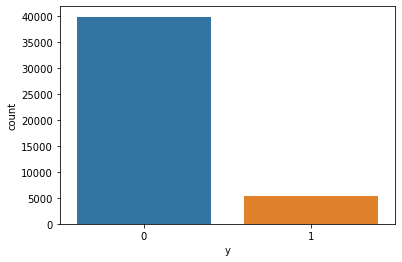

In [12]:

#checking wether the dataset is balanced or not with output variable

sns.countplot("y",data=df_new)

In [13]:
# converting data into 0 and 1 format for making model
df_1= df_new.drop(['job','marital', 'education', 'contact', 
             'housing', 'loan', 'day', 'month', 'poutcome',],axis=1)

In [14]:
d_f= df_1.replace({'default': {'yes': 1, 
                                'no':0}})

d_f

,age,default,balance,duration,campaign,pdays,previous,y
0,58,0,2143,261,1,-1,0,0
1,44,0,29,151,1,-1,0,0
2,33,0,2,76,1,-1,0,0
3,47,0,1506,92,1,-1,0,0
4,33,0,1,198,1,-1,0,0
...,...,...,...,...,...,...,...,...
45206,51,0,825,977,3,-1,0,1
45207,71,0,1729,456,2,-1,0,1
45208,72,0,5715,1127,5,184,3,1
45209,57,0,668,508,4,-1,0,0


In [15]:
d_f.isnull().sum()

age         0
default     0
balance     0
duration    0
campaign    0
pdays       0
previous    0
y           0
dtype: int64

In [16]:
d_f

,age,default,balance,duration,campaign,pdays,previous,y
0,58,0,2143,261,1,-1,0,0
1,44,0,29,151,1,-1,0,0
2,33,0,2,76,1,-1,0,0
3,47,0,1506,92,1,-1,0,0
4,33,0,1,198,1,-1,0,0
...,...,...,...,...,...,...,...,...
45206,51,0,825,977,3,-1,0,1
45207,71,0,1729,456,2,-1,0,1
45208,72,0,5715,1127,5,184,3,1
45209,57,0,668,508,4,-1,0,0


In [17]:
#dividing our data into input and output varaiable
x=d_f.iloc[:,0:7]

In [18]:
x

,age,default,balance,duration,campaign,pdays,previous
0,58,0,2143,261,1,-1,0
1,44,0,29,151,1,-1,0
2,33,0,2,76,1,-1,0
3,47,0,1506,92,1,-1,0
4,33,0,1,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,0,825,977,3,-1,0
45207,71,0,1729,456,2,-1,0
45208,72,0,5715,1127,5,184,3
45209,57,0,668,508,4,-1,0


In [19]:
y=d_f.iloc[:,-1]

In [20]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

# logistic regression


In [21]:
#building the model
tester=LogisticRegression()
tester.fit(x,y)

C:\Users\Karan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
y_pred=tester.predict(x)

In [23]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [24]:
y_pred_df=pd.DataFrame({"actual": y,"predicted_prob":y_pred})

In [25]:
y_pred_df

,actual,predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,0
45207,1,0
45208,1,0
45209,0,0


In [26]:
d_f["logst_reg"]=y_pred #used to add column to dataset

In [27]:
d_f

,age,default,balance,duration,campaign,pdays,previous,y,logst_reg
0,58,0,2143,261,1,-1,0,0,0
1,44,0,29,151,1,-1,0,0,0
2,33,0,2,76,1,-1,0,0,0
3,47,0,1506,92,1,-1,0,0,0
4,33,0,1,198,1,-1,0,0,0
...,...,...,...,...,...,...,...,...,...
45206,51,0,825,977,3,-1,0,1,0
45207,71,0,1729,456,2,-1,0,1,0
45208,72,0,5715,1127,5,184,3,1,0
45209,57,0,668,508,4,-1,0,0,0


In [28]:
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     39922
           1       0.56      0.14      0.22      5289

    accuracy                           0.89     45211
   macro avg       0.73      0.56      0.58     45211
weighted avg       0.86      0.89      0.85     45211



<AxesSubplot:>

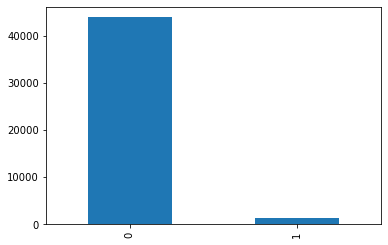

In [29]:
d_f["logst_reg"].value_counts().plot(kind="bar")

In [30]:
d_f["logst_reg"].value_counts()

0    43916
1     1295
Name: logst_reg, dtype: int64